<a href="https://colab.research.google.com/github/DVWNXD/MLbasic/blob/main/9_3_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 1s 0us/step


In [3]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [4]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500,16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 lstm (LSTM)                 (None, 8)                 800       
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [6]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(train_seq,train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 13s 22ms/step - loss: 0.6926 - accuracy: 0.5294 - val_loss: 0.6920 - val_accuracy: 0.5404
Epoch 2/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6905 - accuracy: 0.5852 - val_loss: 0.6894 - val_accuracy: 0.6160
Epoch 3/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6864 - accuracy: 0.6385 - val_loss: 0.6841 - val_accuracy: 0.6344
Epoch 4/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6781 - accuracy: 0.6504 - val_loss: 0.6733 - val_accuracy: 0.6512
Epoch 5/100
313/313 [==============================] - 7s 24ms/step - loss: 0.6596 - accuracy: 0.6672 - val_loss: 0.6465 - val_accuracy: 0.6696
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6053 - accuracy: 0.6982 - val_loss: 0.5618 - val_accuracy: 0.7286
Epoch 7/100
313/313 [==============================] - 7s 24ms/step - loss: 0.5299 - accuracy: 0.7445 - val_loss: 0.5162 - val_accuracy

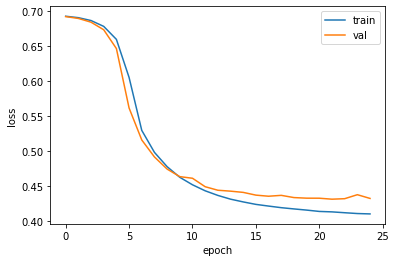

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [8]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [9]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq,train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 10s 22ms/step - loss: 0.6928 - accuracy: 0.5238 - val_loss: 0.6921 - val_accuracy: 0.5728
Epoch 2/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6913 - accuracy: 0.5806 - val_loss: 0.6902 - val_accuracy: 0.5962
Epoch 3/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6878 - accuracy: 0.6138 - val_loss: 0.6851 - val_accuracy: 0.6314
Epoch 4/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6766 - accuracy: 0.6295 - val_loss: 0.6640 - val_accuracy: 0.6134
Epoch 5/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6297 - accuracy: 0.6849 - val_loss: 0.6077 - val_accuracy: 0.7340
Epoch 6/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5908 - accuracy: 0.7355 - val_loss: 0.5819 - val_accuracy: 0.7430
Epoch 7/100
313/313 [==============================] - 7s 21ms/step - loss: 0.5699 - accuracy: 0.7515 - val_loss: 0.5629 - val_accuracy

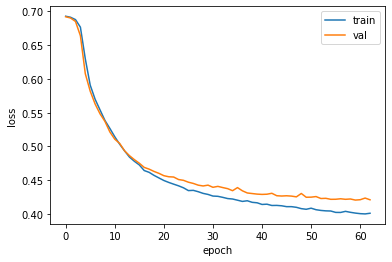

In [12]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [13]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [14]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_2 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_3 (LSTM)               (None, 8)                 544       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [15]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-2rnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq,train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 45ms/step - loss: 0.6926 - accuracy: 0.5302 - val_loss: 0.6917 - val_accuracy: 0.6298
Epoch 2/100
313/313 [==============================] - 13s 43ms/step - loss: 0.6828 - accuracy: 0.6564 - val_loss: 0.6544 - val_accuracy: 0.7002
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6138 - accuracy: 0.6959 - val_loss: 0.5843 - val_accuracy: 0.7184
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5702 - accuracy: 0.7227 - val_loss: 0.5488 - val_accuracy: 0.7386
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5380 - accuracy: 0.7462 - val_loss: 0.5243 - val_accuracy: 0.7570
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5202 - accuracy: 0.7567 - val_loss: 0.5073 - val_accuracy: 0.7660
Epoch 7/100
313/313 [==============================] - 13s 43ms/step - loss: 0.5051 - accuracy: 0.7671 - val_loss: 0.4943 - val_ac

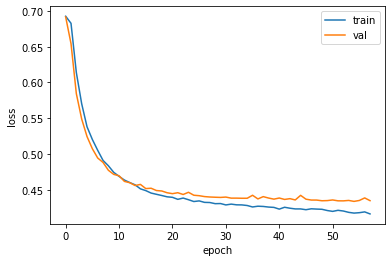

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [17]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500,16,input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [18]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [19]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-gru-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model4.fit(train_seq,train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 26ms/step - loss: 0.6921 - accuracy: 0.5294 - val_loss: 0.6910 - val_accuracy: 0.5316
Epoch 2/100
313/313 [==============================] - 6s 21ms/step - loss: 0.6897 - accuracy: 0.5636 - val_loss: 0.6883 - val_accuracy: 0.5660
Epoch 3/100
313/313 [==============================] - 7s 21ms/step - loss: 0.6858 - accuracy: 0.5914 - val_loss: 0.6839 - val_accuracy: 0.5838
Epoch 4/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6796 - accuracy: 0.6112 - val_loss: 0.6770 - val_accuracy: 0.6022
Epoch 5/100
313/313 [==============================] - 8s 24ms/step - loss: 0.6700 - accuracy: 0.6241 - val_loss: 0.6666 - val_accuracy: 0.6188
Epoch 6/100
313/313 [==============================] - 7s 23ms/step - loss: 0.6560 - accuracy: 0.6387 - val_loss: 0.6517 - val_accuracy: 0.6314
Epoch 7/100
313/313 [==============================] - 7s 22ms/step - loss: 0.6351 - accuracy: 0.6604 - val_loss: 0.6278 - val_accuracy

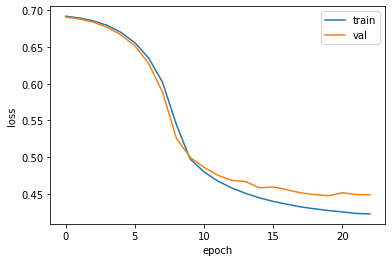

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [22]:
test_seq=pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(val_seq, val_target)

157/157 [==============================] - 3s 16ms/step - loss: 0.4347 - accuracy: 0.8042


[0.4346683621406555, 0.8041999936103821]